<a href="https://colab.research.google.com/github/esteban3622/M2_Actividad_Final_U_Andes/blob/main/M2_Actividad_Final_An%C3%A1lisis_CCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Integradora
**Habilidades Intermedias para Analista de datos**</br>
*Módulo 2: Herramientas de programación para el análisis de datos.</br>
Universidad de los Andes* | *Facultad de Economía* | *Educación Continua*</br>

Esteban Ricardo Higuera Villalba
</br>
</br>
*Agosto de 2023*


<sub>* Ejercicio de simulación pedagógica diseñado para el entrenamiento de competencias de análisis descriptivo de datos.</sub>

## Cámara de Comercio de Bogotá
Para este caso problema usted está analizando información sobre las **entidades en CCB** del registro de información financiera y general para el tercer trimestre de 2022 en la Cámara de Comercio de Bogotá.

La Cámara de Comercio se dispone a lanzar un **programa de entrenamiento** para fortalecer **las ventas las empresas**, y desea identificar en qué tipo de entidades debe focalizar los recursos. Para esto:

- La CCB cuenta con **registros detallados** de cada entidad registrada
- La idea es identificar si es mejor focalizar la convocatoria **por tamaño de empresa** o por **tipo de sociedad**.
- La matrícula mercantil aquí puesta es ficticia, como un id anónimo.

Antes de correr los análisis usted debe **explorar y limpiar** las bases de datos y posteriormente implementar visualizaciones que le permitan aproximarse a la pregunta:

¿Sobre qué tipo de empresas deberían priorizarse los entrenamientos para mejorar las ventas?

![Edificio de la Cámara de Comercio de Bogotá en la calle 26](https://upload.wikimedia.org/wikipedia/commons/1/1d/C%C3%A1mara_4_Comercio_Bogot%C3%A1_Cund%2C_Col.jpg)

### Cargar y observar los datos

In [ ]:
# Importar pandas
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import cv2

In [ ]:
# Clonar repositorio desde GitHub
! git clone https://github.com/esteban3622/M2_Actividad_Final_U_Andes.git

Cloning into 'M2_Actividad_Final_U_Andes'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 21.35 MiB | 21.41 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
# Cargar datos
camara = pd.ExcelFile(r'M2_Actividad_Final_U_Andes/2022-3_ccb_registros.xlsx')
camara.sheet_names

['General', 'Financiera']

#### Ejercicio 1

In [ ]:
# Cargar en dos dataframes distintos cada pestaña modificando el atributo correspondiente
camara_gral = camara.parse('General')
camara_financiera = camara.parse('Financiera')

**Explorar:** revisemos información sobre las columnas de cada tabla. Utilice las funciones info y head de Pandas para cada una de las 2 tablas.

In [ ]:
camara_gral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185495 entries, 0 to 185494
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Matrícula                     185495 non-null  float64
 1   Indicador                     185495 non-null  object 
 2   Período                       185495 non-null  object 
 3   Año                           185495 non-null  int64  
 4   Organización Jurídica         185495 non-null  object 
 5   Tamaño                        185494 non-null  object 
 6   Sector                        185495 non-null  object 
 7   Sección Actividad Económica   185495 non-null  object 
 8   CIIU                          185495 non-null  object 
 9   Cantidad de Establecimientos  185494 non-null  float64
 10  Personal Ocupado              185494 non-null  float64
 11  Importador Exportador         185145 non-null  object 
 12  Categoría                     185494 non-nul

In [ ]:
camara_gral.head()

,Matrícula,Indicador,Período,Año,Organización Jurídica,Tamaño,Sector,Sección Actividad Económica,CIIU,Cantidad de Establecimientos,...,Categoría,Macrosector,Especialización Inteligente,Iniciativa Clúster,País,Departamento,Municipio,Localidad,Barrio,Cantidad Total
0,5061891.0,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,L 68 ACTIVIDADES INMOBILIARIAS,6820 ACTIVIDADES INMOBILIARIAS REALIZADAS A...,0.0,...,Principal,Construcción y Energía,Ciudad-región sostenible,IC Construcción,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",ENGATIVA,SANTA MONICA,2.0
1,5061892.0,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,K 64-66 ACTIVIDADES FINANCIERAS Y DE SEGUROS,6611 ADMINISTRACIÓN DE MERCADOS FINANCIEROS,0.0,...,Principal,Servicios Empresariales,Servicios empresariales,IC Sector financiero,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",CHAPINERO,EL NOGAL,2.0
2,5061893.0,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,L 68 ACTIVIDADES INMOBILIARIAS,6820 ACTIVIDADES INMOBILIARIAS REALIZADAS A...,0.0,...,Principal,Construcción y Energía,Ciudad-región sostenible,IC Construcción,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",SUBA,PRADO VERANIEGO NORTE,2.0
3,5061894.0,Matricula No Renovada,Tercer Trimestre,2022,Persona Natural,Microempresas,Servicios,S 94-96 OTRAS ACTIVIDADES DE SERVICIOS,9511 MANTENIMIENTO Y REPARACIÓN DE COMPUTAD...,1.0,...,Sin Categ,TIC,NaN,NaN,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",TUNJUELITO,EL CARMEN,2.0
4,5061895.0,Matricula No Renovada,Tercer Trimestre,2022,Limitada,Microempresas,Comercio,G 45-47 COMERCIO AL POR MAYOR Y AL POR MENOR; ...,4620 COMERCIO AL POR MAYOR DE MATERIAS PRIM...,0.0,...,Principal,Agropecuario y Agroindustrial,Biopolo,NaN,COLOMBIA,Cundinamarca,CHÍA,NaN,NaN,2.0


Explorando algunas variables en particular

In [ ]:
print('Registros del tamaño de la organización: ' + str(camara_gral['Tamaño'].unique()))
print('Registros de la organización juridica: ' + str(camara_gral['Organización Jurídica'].unique()))
print('Registros del sector: ' + str(camara_gral['Macrosector'].unique()))
print('Registros de la sección actividad económica: ' + str(camara_gral['Sección Actividad Económica'].unique()))

Registros del tamaño de la organización: ['Microempresas' 'Pequeñas' 'Medianas' 'Grandes' nan]
Registros de la organización juridica: ['Sociedad por Acciones Simplificada' 'Persona Natural' 'Limitada'
 'Empresa unipersonal' 'Anonima' 'Comandita Simple' 'Extranjera'
 'Empresa Asociativa de trabajo' 'Comandita por acciones' 'Colectiva'
 'Empresa industrial y Cial del est']
Registros del sector: ['Construcción y Energía' 'Servicios Empresariales' 'TIC'
 'Agropecuario y Agroindustrial' nan 'Químico' 'Moda'
 'Industria de Turismo y Eventos'
 'Industrias Creativas, Culturales y Gráficas' 'Salud']
Registros de la sección actividad económica: ['L 68 ACTIVIDADES INMOBILIARIAS'
 'K 64-66 ACTIVIDADES FINANCIERAS Y DE SEGUROS'
 'S 94-96 OTRAS ACTIVIDADES DE SERVICIOS'
 'G 45-47 COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS'
 'F 41-43 CONSTRUCCIÓN'
 'N 77-82 ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO'
 'M 69-75 ACTIVIDADES PROFESIONALES, CIENTÍFIC

In [ ]:
camara_financiera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185495 entries, 0 to 185494
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Matrícula                 185495 non-null  float64
 1   Total Valor Activos       185494 non-null  float64
 2   Total Valor Pasivos       185494 non-null  float64
 3   Total Valor Patrimonio    185494 non-null  float64
 4   Total Valor Ventas Netas  185494 non-null  float64
dtypes: float64(5)
memory usage: 7.1 MB


In [ ]:
camara_financiera.head()

,Matrícula,Total Valor Activos,Total Valor Pasivos,Total Valor Patrimonio,Total Valor Ventas Netas
0,5061891.0,35936379.0,204403836.0,35936379.0,0.0
1,5061892.0,342953600.0,200448883.0,342953600.0,0.0
2,5061893.0,9500000.0,3545000.0,9500000.0,0.0
3,5061894.0,15693250.0,1221500.0,15693250.0,0.0
4,5061895.0,99019844.0,64768753.0,99019844.0,0.0


#### Ejercicio 2

En un documento aparte, escriba brevemente los datos que tiene cada data frame.

De acuerdo con los dos data frame que se tienen (***Camara General*** y ***Camara Financiera***), se puede mencionar que: En el caso particular de la Camara General se dispone de datos cualitativos de las diferentes empresas. Y para el data frame de la Camara Financiera cuenta con datos cuantitativos relacionados con el área monetaria de cada una de las empresas.

### Limpieza

#### Ejercicio 3

**Ejercicio**: Note que una de las columnas (Total Valor Ventas Netas) parece tener sólamente valores cero. Detalle esta columna para revisar qué tipos de valores tiene. Puede utilizar la función describe para obtener los cuartiles.





In [ ]:
camara_financiera.describe()

,Matrícula,Total Valor Activos,Total Valor Pasivos,Total Valor Patrimonio,Total Valor Ventas Netas
count,1.854950e+05,1.854940e+05,1.854940e+05,1.854940e+05,1.854940e+05
mean,5.154638e+06,4.029827e+08,2.703131e+08,4.117373e+08,1.949811e+08
std,5.354794e+04,1.147684e+10,9.841262e+09,1.180164e+10,2.237441e+10
min,5.061891e+06,-2.000000e+06,-2.092842e+09,-1.015047e+08,-2.087387e+09
25%,5.108265e+06,1.800000e+06,0.000000e+00,1.770250e+06,0.000000e+00
50%,5.154638e+06,9.810000e+06,0.000000e+00,9.600000e+06,0.000000e+00
75%,5.201012e+06,5.208697e+07,7.638658e+06,5.170525e+07,0.000000e+00
max,5.247385e+06,2.539298e+12,2.298869e+12,2.539298e+12,7.907010e+12


El valor mínimo es negativo, y tenemos que ¡al menos el 75% de los datos es cero!

In [ ]:
# Vamos a quedarnos sólamente con las filas que tienen ventas mayores a cero.
# Es decir, hacemos elegibles sólamente a las empresas que han vendido algo en
# este periodo.
no_utilizar = camara_financiera['Total Valor Ventas Netas'] <= 0
no_utilizar

0          True
1          True
2          True
3          True
4          True
          ...  
185490     True
185491     True
185492     True
185493     True
185494    False
Name: Total Valor Ventas Netas, Length: 185495, dtype: bool

In [ ]:
# Usamos loc siempre que queremos reemplazar valores utilizando condiciones lógicas
camara_financiera.loc[no_utilizar, 'Total Valor Ventas Netas'] = np.nan

In [ ]:
# Así, tenemos:
camara_financiera.describe()

,Matrícula,Total Valor Activos,Total Valor Pasivos,Total Valor Patrimonio,Total Valor Ventas Netas
count,1.854950e+05,1.854940e+05,1.854940e+05,1.854940e+05,3.995800e+04
mean,5.154638e+06,4.029827e+08,2.703131e+08,4.117373e+08,9.052059e+08
std,5.354794e+04,1.147684e+10,9.841262e+09,1.180164e+10,4.820130e+10
min,5.061891e+06,-2.000000e+06,-2.092842e+09,-1.015047e+08,1.000000e+00
25%,5.108265e+06,1.800000e+06,0.000000e+00,1.770250e+06,7.682892e+06
50%,5.154638e+06,9.810000e+06,0.000000e+00,9.600000e+06,5.121050e+07
75%,5.201012e+06,5.208697e+07,7.638658e+06,5.170525e+07,2.391192e+08
max,5.247385e+06,2.539298e+12,2.298869e+12,2.539298e+12,7.907010e+12


### Unión

#### Ejercicio 4

**Ejercicio**: Considere qué tipo de unión es adecuada entre las dos tablas para poder relacionar ventas con el tipo de sociedad/entidad. Impleméntela a continuación. En caso de ser una unión horizontal considere todas las filas.

In [ ]:
entidades_camara = pd.merge(camara_gral, camara_financiera, on='Matrícula', how='outer')

In [ ]:
entidades_camara.head(3)

,Matrícula,Indicador,Período,Año,Organización Jurídica,Tamaño,Sector,Sección Actividad Económica,CIIU,Cantidad de Establecimientos,...,País,Departamento,Municipio,Localidad,Barrio,Cantidad Total,Total Valor Activos,Total Valor Pasivos,Total Valor Patrimonio,Total Valor Ventas Netas
0,5061891.0,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,L 68 ACTIVIDADES INMOBILIARIAS,6820 ACTIVIDADES INMOBILIARIAS REALIZADAS A...,0.0,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",ENGATIVA,SANTA MONICA,2.0,35936379.0,204403836.0,35936379.0,NaN
1,5061892.0,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,K 64-66 ACTIVIDADES FINANCIERAS Y DE SEGUROS,6611 ADMINISTRACIÓN DE MERCADOS FINANCIEROS,0.0,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",CHAPINERO,EL NOGAL,2.0,342953600.0,200448883.0,342953600.0,NaN
2,5061893.0,Matricula No Renovada,Tercer Trimestre,2022,Sociedad por Acciones Simplificada,Microempresas,Servicios,L 68 ACTIVIDADES INMOBILIARIAS,6820 ACTIVIDADES INMOBILIARIAS REALIZADAS A...,0.0,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",SUBA,PRADO VERANIEGO NORTE,2.0,9500000.0,3545000.0,9500000.0,NaN


In [ ]:
entidades_camara['Organización Jurídica'].value_counts()

Sociedad por Acciones Simplificada    61897
Persona Natural                       56738
Limitada                              43944
Empresa unipersonal                   10904
Anonima                                6010
Comandita Simple                       3616
Extranjera                             1022
Empresa Asociativa de trabajo           903
Comandita por acciones                  362
Colectiva                                98
Empresa industrial y Cial del est         1
Name: Organización Jurídica, dtype: int64

Tenga en cuenta si la cantidad de filas que pegaron tiene sentido.

### Gráficos

Para elaborar el análisis gráfico, se le sugiere un procedimiento tipo *drill down*.

Esto es:</br>
1) Formalizamos estadísticamente la pregunta de negocio</br>
2) Hacemos visualizaciones univariadas</br>
3) Hacemos visualizaciones cruzadas

Primero hagamos un par de procedimientos de referencia. Primero, veamos la distribución de las ventas netas por tipo de organización jurídica. Eso nos da una idea de qué magnitud tienen los valores.

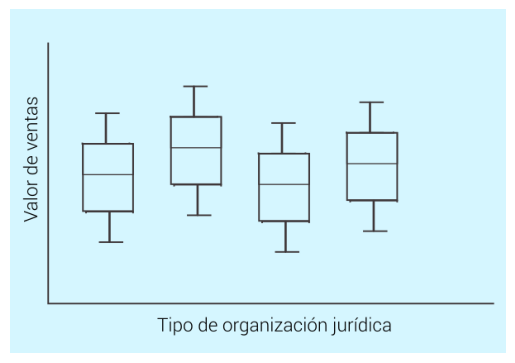

In [ ]:
# Este estilo de gráfica queremos lograr (recuerden poner los archivos de imágen en la carpeta sample_data)
g1 = cv2.imread(r'M2_Actividad_Final_U_Andes/Graficos/g1.png',1)
plt.imshow(g1)
plt.axis("off")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Sociedad por Acciones Simplificada'),
  Text(1, 0, 'Persona Natural'),
  Text(2, 0, 'Limitada'),
  Text(3, 0, 'Empresa unipersonal'),
  Text(4, 0, 'Anonima'),
  Text(5, 0, 'Comandita Simple'),
  Text(6, 0, 'Extranjera'),
  Text(7, 0, 'Empresa Asociativa de trabajo'),
  Text(8, 0, 'Comandita por acciones'),
  Text(9, 0, 'Colectiva'),
  Text(10, 0, 'Empresa industrial y Cial del est')])

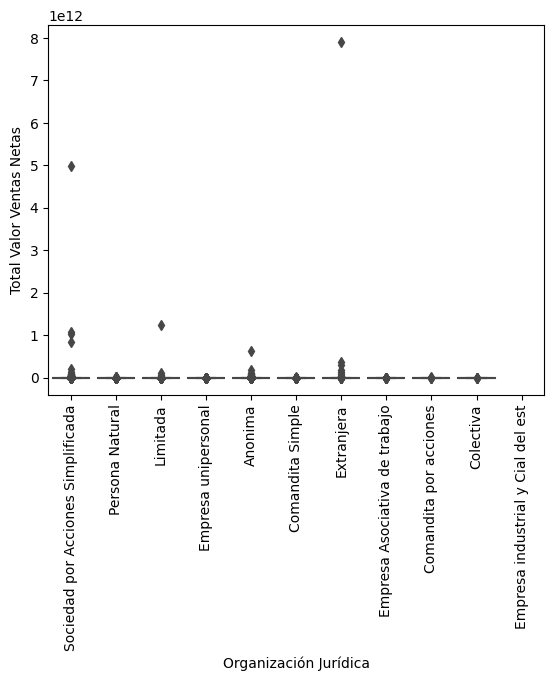

In [ ]:
sns.boxplot(x="Organización Jurídica", y="Total Valor Ventas Netas", data=entidades_camara)
plt.xticks(rotation=90)

**Como tenemos unos datos muy altos, parecen muy atípicos. Lo mejor es filtrar por tamaño de empresa. Y podemos no considerar valores atípicos.**

#### Ejercicio 5
Lea y modifique el siguiente código para observar empresas grandes en el gráfico.

Text(0.5, 1.0, 'Distribución de ventas de Microempresas \n por tipo de persona jurídica')

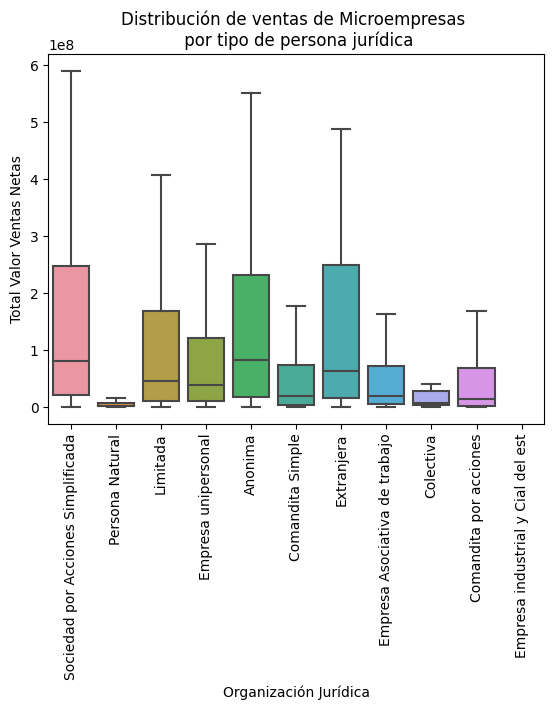

In [ ]:
# Le podemos cambiar el tamaño al que queramos
tamanio1 = entidades_camara['Tamaño'] == 'Microempresas'
tamanio2 = entidades_camara['Tamaño'] == 'Pequeñas'
tamanio3 = entidades_camara['Tamaño'] == 'Medianas'
tamanio4 = entidades_camara['Tamaño'] == 'Grandes'

micro = sns.boxplot(x="Organización Jurídica", y="Total Valor Ventas Netas", data=entidades_camara[tamanio1], showfliers=False)
plt.xticks(rotation=90)
plt.title('Distribución de ventas de Microempresas \n por tipo de persona jurídica')

Text(0.5, 1.0, 'Distribución de ventas de empresas grandes \n por tipo de persona jurídica')

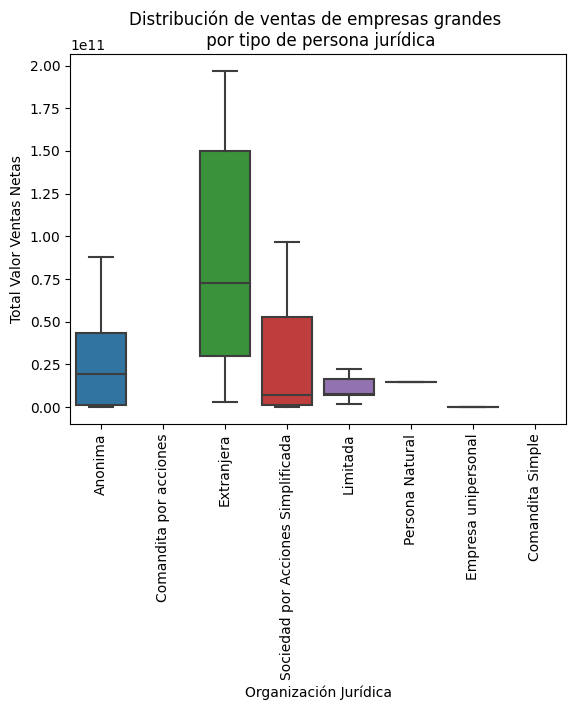

In [ ]:
grandes = sns.boxplot(x="Organización Jurídica", y="Total Valor Ventas Netas", data=entidades_camara[tamanio4], showfliers=False)
plt.xticks(rotation=90)
plt.title('Distribución de ventas de empresas grandes \n por tipo de persona jurídica')

### Drill down


Vamos a jugar principalmente con:

* Tamaño de empreas
* Tipo de organización jurídica
* Total de ventas

Primero identificamos cuántas empresas se encuentran en cada categoría de las vairables categóricas:

In [ ]:
# Número de empresas en cada tamaño
entidades_camara['Tamaño'].value_counts()

Microempresas    171836
Pequeñas          11839
Medianas           1566
Grandes             253
Name: Tamaño, dtype: int64

In [ ]:
# EJERCICIO OPCIONAL: Calcule el número de empresas en cada categoría de organización jurídica inspirándose en la celda anterior
# Número de empresas por organización jurídica
entidades_camara['Organización Jurídica'].value_counts()

Sociedad por Acciones Simplificada    61897
Persona Natural                       56738
Limitada                              43944
Empresa unipersonal                   10904
Anonima                                6010
Comandita Simple                       3616
Extranjera                             1022
Empresa Asociativa de trabajo           903
Comandita por acciones                  362
Colectiva                                98
Empresa industrial y Cial del est         1
Name: Organización Jurídica, dtype: int64

Ahora calculamos el total de las ventas netas de todas las empresas, para tener una magnitud superior contra la cual comparar los valores.

In [ ]:
# Total de referencia de ventas netas
camara_financiera['Total Valor Ventas Netas'].sum()

36170217581191.0

### Gráficos por grupos
Ahora comencemos a elaborar un par de gráficos de ventas netas por cada variable categórica:

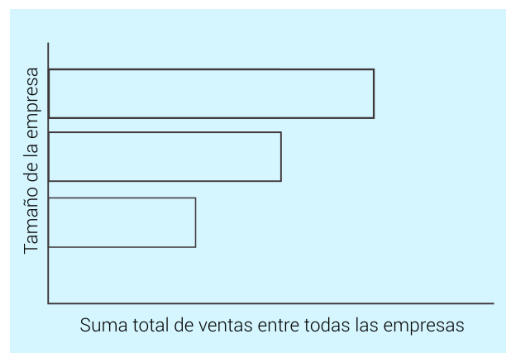

In [ ]:
# Este estilo de gráfica queremos lograr (recuerden poner los archivos de imágen en la carpeta sample_data)
g1 = cv2.imread(r'M2_Actividad_Final_U_Andes/Graficos/g3.png',1)
plt.imshow(g1)
plt.axis("off")
plt.show()

In [ ]:
# Agrupamos por Tamaño univariadamente para lograr esta gráfica, y calculamos la suma de ventas netas, y la cuenta de empresas en cada grupo
entidades_camara_T = entidades_camara.groupby('Tamaño').agg({'Total Valor Ventas Netas': 'sum','Matrícula':'count'}).reset_index()
entidades_camara_T = entidades_camara_T.rename(columns={'Matrícula': 'Empresas'})
entidades_camara_T = entidades_camara_T.sort_values('Total Valor Ventas Netas',ascending=False)

In [ ]:
entidades_camara_T.head()

,Tamaño,Total Valor Ventas Netas,Empresas
3,Pequeñas,1.669590e+13,11839
0,Grandes,9.840931e+12,253
2,Microempresas,5.739420e+12,171836
1,Medianas,3.893970e+12,1566


[Text(0.5, 1.0, 'Composición de las ventas por tipo de empresa')]

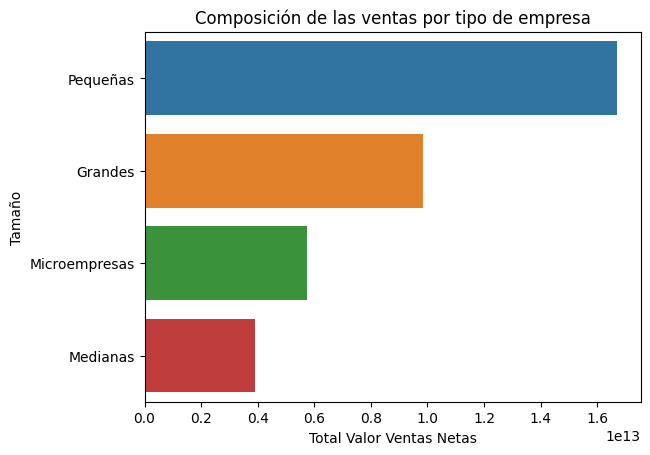

In [ ]:
sns.barplot(y='Tamaño',x='Total Valor Ventas Netas',data=entidades_camara_T).set(title = "Composición de las ventas por tipo de empresa")

#### Ejercicio 6
Elabore el siguiente gráfico para continuar el análisis.
Puede inspirarse en el algoritmo del anterior.

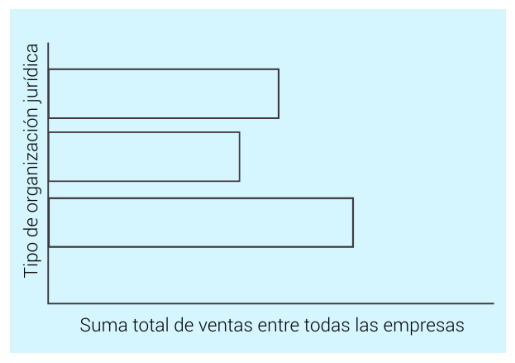

In [ ]:
# Este estilo de gráfica queremos lograr (recuerden poner los archivos de imágen en la carpeta sample_data)
g1 = cv2.imread(r'M2_Actividad_Final_U_Andes/Graficos/g2.png',1)
plt.imshow(g1)
plt.axis("off")
plt.show()

In [ ]:
# Grupos univariados por organización jurídica EJERCICIO
entidades_camara_O = entidades_camara.groupby('Organización Jurídica').agg({'Total Valor Ventas Netas': 'sum','Matrícula':'count'}).reset_index()
entidades_camara_O = entidades_camara_O.rename(columns={'Matrícula': 'Empresas'})
entidades_camara_O = entidades_camara_O.sort_values('Organización Jurídica',ascending=True)

entidades_camara_O.head()

,Organización Jurídica,Total Valor Ventas Netas,Empresas
0,Anonima,4.165738e+12,6010
1,Colectiva,3.110195e+09,98
2,Comandita Simple,2.121308e+11,3616
3,Comandita por acciones,2.820496e+10,362
4,Empresa Asociativa de trabajo,1.578103e+10,903


[Text(0.5, 1.0, 'Composición de las ventas por tipo de organización')]

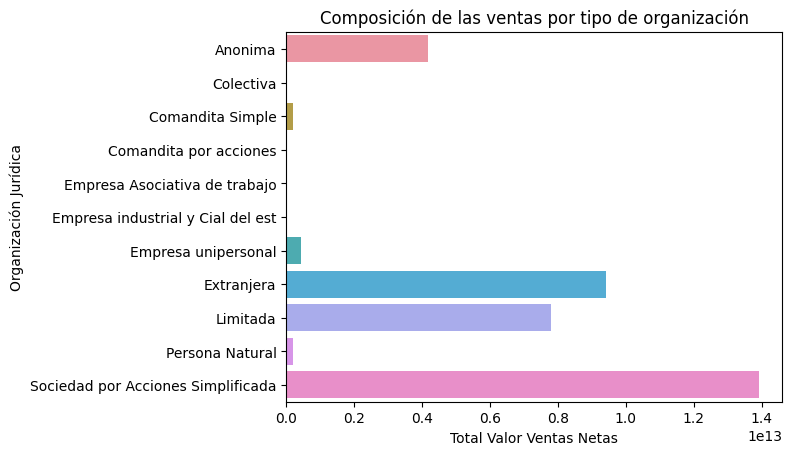

In [ ]:
# EJERCICIO: gráfico
sns.barplot(y='Organización Jurídica',x='Total Valor Ventas Netas',data=entidades_camara_O).set(title = "Composición de las ventas por tipo de organización")

#### Ejercicio 7
Finalmente combinamos los grupos para lograr una gráfica como la siguiente:

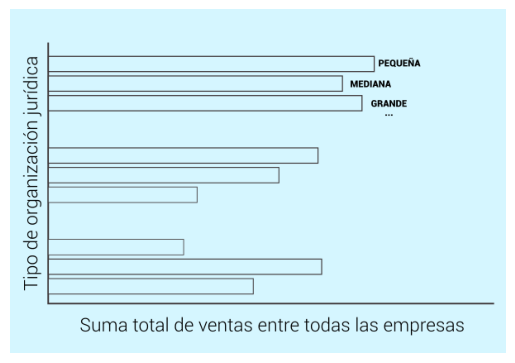

In [ ]:
# Este estilo de gráfica queremos lograr (recuerden poner los archivos de imágen en la carpeta sample_data)
g1 = cv2.imread(r'M2_Actividad_Final_U_Andes/Graficos/g4.png',1)
plt.imshow(g1)
plt.axis("off")
plt.show()

In [ ]:
# Y ahora las combinamos, tenga en cuenta que ahora al groupby le proporcionamos una lista de dos columnas

entidades_camara_OT = entidades_camara.groupby(['Organización Jurídica', 'Tamaño']).agg({'Total Valor Ventas Netas': 'sum','Matrícula':'count'}).reset_index()
entidades_camara_OT = entidades_camara_OT.rename(columns={'Matrícula': 'Empresas'})
entidades_camara_OT = entidades_camara_OT.sort_values('Organización Jurídica', ascending=False)

entidades_camara_OT.head()

,Organización Jurídica,Tamaño,Total Valor Ventas Netas,Empresas
37,Sociedad por Acciones Simplificada,Pequeñas,3.271560e+12,5938
36,Sociedad por Acciones Simplificada,Microempresas,1.484120e+12,54979
35,Sociedad por Acciones Simplificada,Medianas,1.586472e+12,846
34,Sociedad por Acciones Simplificada,Grandes,7.571839e+12,134
33,Persona Natural,Pequeñas,6.128701e+10,891


[Text(0.5, 1.0, 'Composición de las ventas \n por tipo de organización y tamaño')]

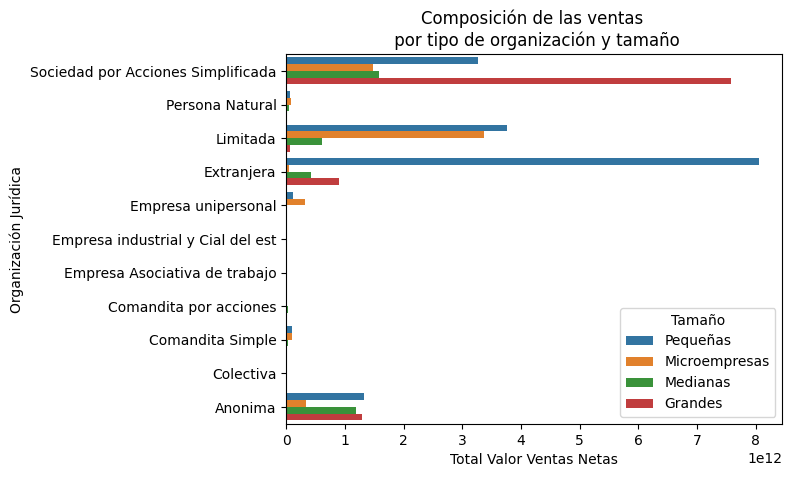

In [ ]:
sns.barplot(y= 'Organización Jurídica', x= 'Total Valor Ventas Netas', data= entidades_camara_OT,
            hue= 'Tamaño').set(title = "Composición de las ventas \n por tipo de organización y tamaño")

## Análisis con otras variables

### Macrosector

In [ ]:
entidades_camara_T = entidades_camara.groupby('Macrosector').agg({'Total Valor Ventas Netas': 'sum','Matrícula':'count'}).reset_index()
entidades_camara_T = entidades_camara_T.rename(columns={'Matrícula': 'Empresas'})
entidades_camara_T = entidades_camara_T.sort_values('Total Valor Ventas Netas',ascending=False)
entidades_camara_T

,Macrosector,Total Valor Ventas Netas,Empresas
1,Construcción y Energía,1.282642e+13,35538
7,Servicios Empresariales,1.192162e+13,30005
5,Químico,1.815636e+12,8427
0,Agropecuario y Agroindustrial,1.528784e+12,14902
4,Moda,1.041278e+12,12467
8,TIC,1.001675e+12,13466
2,Industria de Turismo y Eventos,6.946144e+11,8981
3,"Industrias Creativas, Culturales y Gráficas",6.799688e+11,11485
6,Salud,2.904921e+11,5130


[Text(0.5, 1.0, 'Composición de las ventas por Macrosectores')]

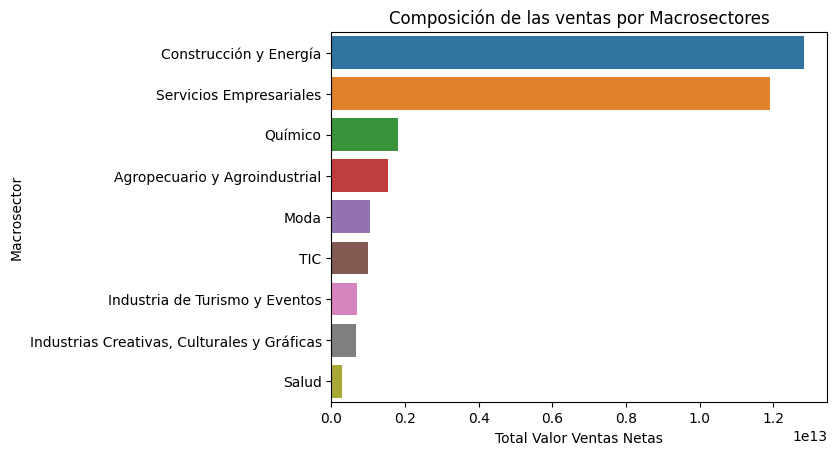

In [ ]:
sns.barplot(y='Macrosector',x='Total Valor Ventas Netas',data=entidades_camara_T).set(title = "Composición de las ventas por Macrosectores")

In [ ]:
entidades_camara_T = entidades_camara.groupby(['Tamaño', 'Macrosector']).agg({'Total Valor Ventas Netas': 'sum','Matrícula':'count'}).reset_index()
entidades_camara_T = entidades_camara_T.rename(columns={'Matrícula': 'Empresas'})
entidades_camara_T = entidades_camara_T.sort_values(['Macrosector', 'Total Valor Ventas Netas'],ascending=False)
entidades_camara_T

,Tamaño,Macrosector,Total Valor Ventas Netas,Empresas
35,Pequeñas,TIC,3.788396e+11,564
26,Microempresas,TIC,3.291691e+11,12837
8,Grandes,TIC,1.515861e+11,4
17,Medianas,TIC,1.420805e+11,60
34,Pequeñas,Servicios Empresariales,8.887569e+12,1951
7,Grandes,Servicios Empresariales,1.528939e+12,52
25,Microempresas,Servicios Empresariales,9.538303e+11,27710
16,Medianas,Servicios Empresariales,5.512873e+11,292
33,Pequeñas,Salud,1.002144e+11,253
24,Microempresas,Salud,9.750818e+10,4835


[Text(0.5, 1.0, 'Composición de las ventas \n por el macrosector y tamaño')]

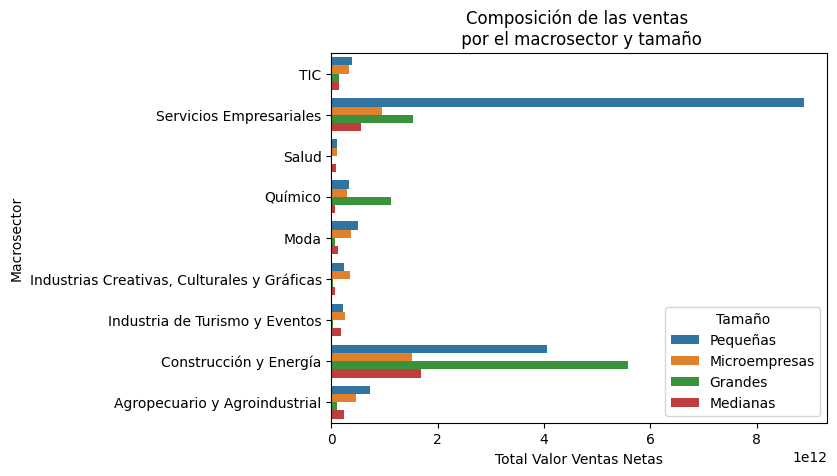

In [ ]:
sns.barplot(y= 'Macrosector', x= 'Total Valor Ventas Netas', data= entidades_camara_T,
            hue= 'Tamaño').set(title = "Composición de las ventas \n por el macrosector y tamaño")

### Sección Actividad Económica

In [ ]:
entidades_camara_T = entidades_camara.groupby('Sección Actividad Económica').agg({'Total Valor Ventas Netas': 'sum','Matrícula':'count'}).reset_index()
entidades_camara_T = entidades_camara_T.rename(columns={'Matrícula': 'Empresas'})
entidades_camara_T = entidades_camara_T.sort_values('Total Valor Ventas Netas',ascending=False)
entidades_camara_T

,Sección Actividad Económica,Total Valor Ventas Netas,Empresas
6,G 45-47 COMERCIO AL POR MAYOR Y AL POR MENOR; ...,1.551756e+13,53100
7,H 49-53 TRANSPORTE Y ALMACENAMIENTO,8.855049e+12,7263
13,N 77-82 ACTIVIDADES DE SERVICIOS ADMINISTRATIV...,2.307773e+12,11757
2,C 10-33 INDUSTRIAS MANUFACTURERAS,2.241121e+12,33176
5,F 41-43 CONSTRUCCIÓN,1.863501e+12,11577
12,"M 69-75 ACTIVIDADES PROFESIONALES, CIENTÍFICAS...",1.532903e+12,15461
4,E 36-39 DISTRIBUCIÓN DE AGUA; EVACUACIÓN Y TRA...,6.451845e+11,1529
9,J 58-63 INFORMACIÓN Y COMUNICACIONES,6.340829e+11,9785
8,I 51-56 ALOJAMIENTO Y SERVICIOS DE COMIDA,4.373284e+11,7206
1,B 05-09 EXPLOTACIÓN DE MINAS Y CANTERAS,4.251162e+11,2032


[Text(0.5, 1.0, 'Composición de las ventas por Sección Actividad Económica')]

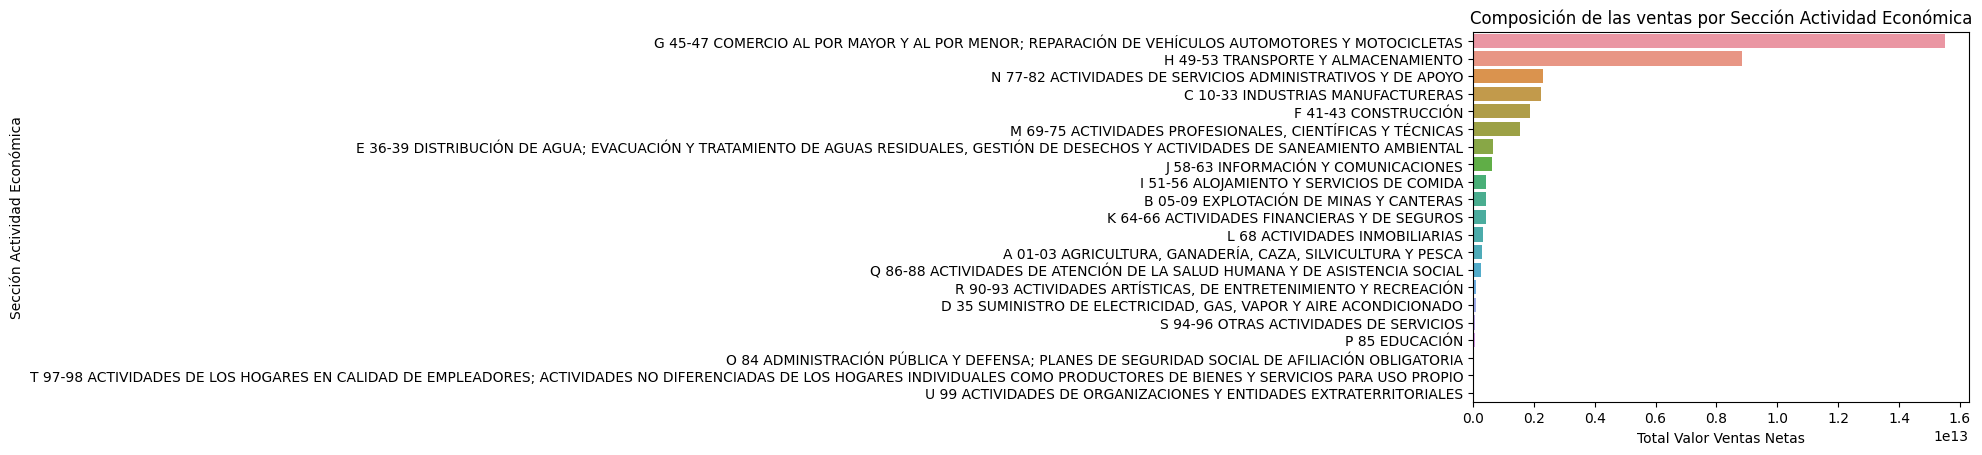

In [ ]:
sns.barplot(y='Sección Actividad Económica',x='Total Valor Ventas Netas',data=entidades_camara_T).set(title = "Composición de las ventas por Sección Actividad Económica")